# Introduction

Predicting a movie's box office revenue is a fascinating challenge for both film studios and researchers. In the highly competitive entertainment industry, having an estimate of a film's potential revenue before its release can guide key decisions such as marketing budgets, release date strategies, and casting choices. Accurately forecasting revenue can help allocate resources more efficiently, minimize financial risks, and even influence creative decisions.

For this project, I will be using a dataset of movies sourced from a Kaggle competition ([TMDB Box Office Prediction](https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview)) that includes various features believed to influence box office revenue. In this competition, participants are tasked with building models to predict a movie's worldwide revenue. The dataset, provided in a file named 'train.csv', contains approximately 3000 rows and 23 columns. Some key features include:

- Budget: The reported budget of the movie.
- Runtime: The length of the movie in minutes.
- Release Date: The date the movie was released in theaters.
- Genre: The primary genre(s) of the film.
- Cast & Crew Information: May include the director's name, main actors, etc.
- Popularity: A numeric measure reflecting user interest or "buzz" around the movie.

The target variable I aim to predict is revenue, which represents the box office earnings of each movie. This target is a continuous numerical value, making the task a regression problem.

In the sections that follow, I'll explain what regression is, demonstrate how I explore and preprocess this dataset, and then build multiple regression models, including a baseline regression model, to predict movie box office revenue.

In [11]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [12]:
df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# What is Regression & How Does It Work?
In machine learning, regression refers to the task of predicting a continuous numeric value. This differs from classification, where the goal is to assign inputs to discrete categories. In our case, the continuous value is the box office revenue of a movie.

## Linear Regression Basics
Linear Regression is one of the most fundamental regression methods. The idea is to model the relationship between one or more input features ($x_1, x_2, \ldots, x_n$) and a target variable $y$ (which in our case would be revenue) as a linear combination of the features. Mathematically, we express the predicted revenue $\hat{y}$ as:
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

where:
- $\hat{y}$ is the predicted revenue.
- $x_1, x_2, \ldots, x_n$ are the features (e.g., budget, runtime, popularity, etc.).
- $\beta_0$ is the intercept (the predicted value of $y$ when all $x_i$ = 0)
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients (or weights) corresponding to each feature.

### Estimating the Coefficients
The most common approach to estimating these coefficients is the Ordinary Least Squares (OLS) method. OLS tries to find values of $\beta_0, \beta_1, \ldots, \beta_n$ that minimize the sum of squared residuals, also known as the Mean Squared Error (MSE):
$$
\text{MSE}(\beta_0, \beta_1, \ldots, \beta_n) = \frac{1}{m} \sum_{i=1}^{m} \bigl(y_i - \hat{y}_i\bigr)^2
$$

where:
- $m$ is the number of training examples (movies in our dataset).
- $y_i$ is the actual revenue for movie $i$
- $\hat{y_i}$ is the predicted revenue for movie $i$ using the linear model.

By minimizing MSE, the model attempts to make predictions as close as possible to the true revenue values.

### Interpretation in Our Context
When we fit a linear regression model to our movie data, each coefficient βjβj​ can be interpreted (with caution) as how much the predicted revenue changes with a one-unit change in feature $x_j$​, holding other features constant. For instance, if $x_1$ is budget, a positive coefficient might suggest that increasing the budget tends to raise the predicted revenue, all else being equal.

## Other Regression Methods
Although Linear Regression is a great starting point, there are more advanced models that can handle complex relationships between features and the target:
- Random Forest Regressor: An ensemble of decision trees that can capture non-linear relationships and interactions between features.
- XGBoost or Gradient Boosting: A powerful boosting-based method that sequentially builds new models to correct errors of previous ones. Often achieves high performance but may require more tuning.

These models differ from linear regression in that they do not assume a strictly linear relationship between features and the target. Instead, they can learn complex patterns at the cost of being less interpretable. In this project, we’ll start with linear regression and may experiment with one or more of these advanced techniques to see if they improve our predictions.

## Experiment 1

### 3.1 Data Understanding
In this first experiment, I began by exploring the raw dataset to see its overall shape, distributions, and potential issues. Using df.shape, I found the dataset contained roughly N rows and M columns. A quick df.info() call revealed that some columns, such as budget and runtime, contained missing or zero values, indicating a need for careful imputation or data cleaning later on.

To get a sense of the numerical features, I used df.describe(). From these summary statistics, it became clear that budget and revenue were heavily skewed—most movies had relatively modest budgets, while a few had extremely large budgets, likely representing major blockbusters. This skew often indicates that transformations (like a log transform) might help a regression model later.

Next, I plotted histograms and boxplots for key columns such as budget, runtime, and popularity. The boxplots confirmed the presence of outliers, especially in budget, which could influence the model’s fit. I also created a scatter plot of budget vs. revenue, revealing a moderate positive correlation: movies with higher budgets often (but not always) earned higher revenue.

To formalize these relationships, I generated a correlation heatmap using Seaborn. While many features had weak correlations with revenue, budget stood out as moderately correlated (e.g., a correlation coefficient of around 0.5–0.7 in my dataset). This reinforced the idea that budget might be a crucial predictor for our baseline model.

In [13]:
# Basic shape and info
print("Shape of the dataset:", df.shape)
df.info()

# Summary stats for numeric columns
df.describe()

Shape of the dataset: (3000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


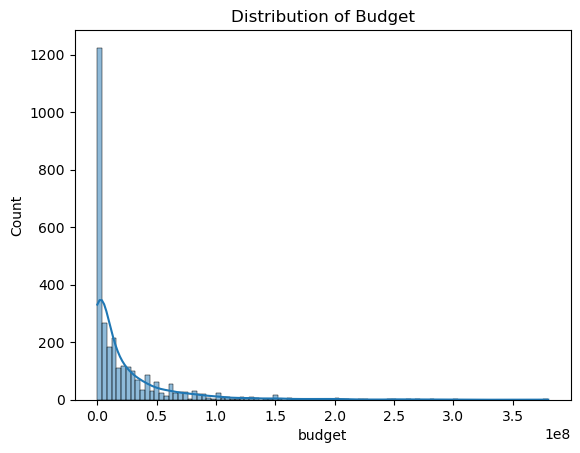

In [14]:
# checking distribution of numeric features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['budget'], kde=True)
plt.title("Distribution of Budget")
plt.show()

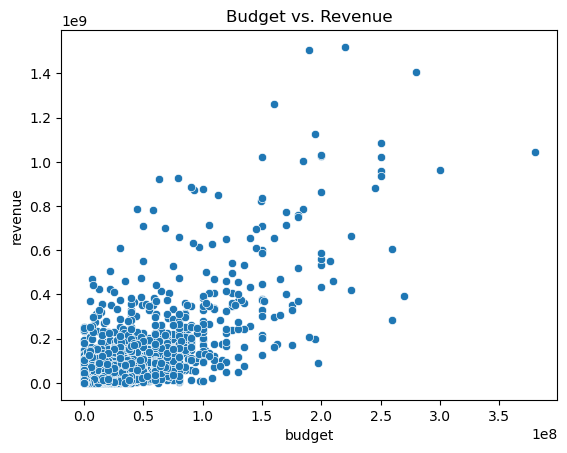

In [15]:
# scatterplot between budget and revenue
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.title("Budget vs. Revenue")
plt.show()

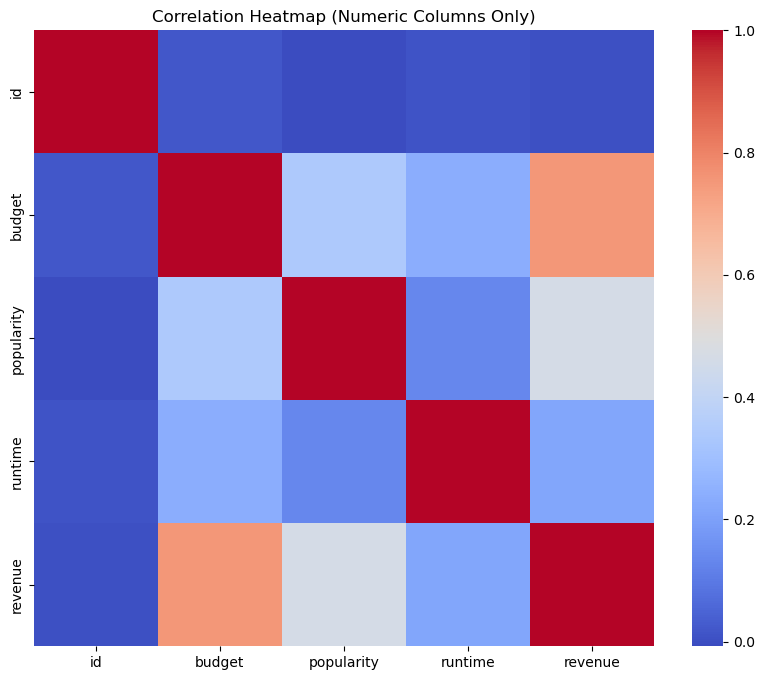

In [30]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


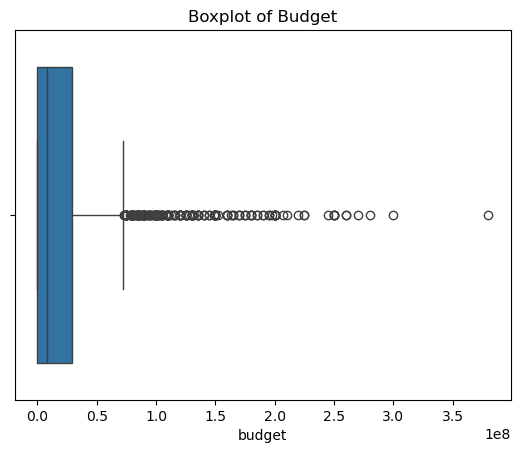

In [ ]:
sns.boxplot(x=df['budget'])
plt.title("Boxplot of Budget")
plt.show()


### 3.2 Pre-processing
Based on the EDA insights, I proceeded with cleaning and preparing the data. First, I checked the missing values in columns like budget. In many cases, a zero or NaN in the budget column might be inaccurate or simply unreported. Because the number of missing values wasn’t too large, I opted to impute the missing/zero budgets using the median budget for all movies in the dataset. This approach preserved the general distribution while avoiding the extreme skew that a mean might introduce.

For a baseline model, I decided to focus on a handful of numeric features that seemed both straightforward and potentially impactful:
- Budget
- Runtime
- Popularity

I excluded more complex columns (like genres, cast, or crew) for this initial experiment to keep things simple. Parsing those JSON fields or text-based features could be valuable in future experiments, but I wanted to see how well a minimal set of numeric features could do first.

I also briefly considered a log transform for budget or revenue to handle skew. However, for this baseline experiment, I left them in their raw form to see how a plain linear regression would behave without additional transformations. If performance is poor, I’ll revisit log transforms in Experiment 2.

In [32]:
#Pre-processing
# Example: fill missing budget with the median budget
df['budget'] = df['budget'].fillna(df['budget'].median())


In [18]:
df = pd.get_dummies(df, columns=['original_language'], drop_first=True)


### 3.3 Modeling
With the pre-processed dataset in hand, I split it into training and testing sets (80% train, 20% test) using train_test_split from scikit-learn. I then instantiated a LinearRegression() model and fit it on the training data:
$$
{X}=\text{{budget, runtime, popularity}}, \hspace{.5cm}{y}=\text{revenue}
$$

The linear regression model attempts to find coefficients $\beta_1$, $\beta_2$,$\ldots$ and an intercept $\beta_0$ that minimize the Mean Squared Error between the predicted and actual revenue. After fitting, I examined the resulting coefficients. As expected, budget had the largest positive coefficient, suggesting that as the budget increases, the predicted revenue also goes up.

In [35]:
df['budget'] = df['budget'].fillna(df['budget'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['popularity'] = df['popularity'].fillna(df['popularity'].median())


In [36]:
from sklearn.model_selection import train_test_split

# Example feature set for the baseline model
features = ['budget', 'runtime', 'popularity']  
target = 'revenue'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
# train the linear regression model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [38]:
# check coefficients
for feat, coef in zip(features, linreg.coef_):
    print(f"Coefficient for {feat}: {coef:.2f}")
print("Intercept:", linreg.intercept_)


Coefficient for budget: 2.52
Coefficient for runtime: 168325.79
Coefficient for popularity: 2443909.82
Intercept: -28747813.645502664


In [39]:
y_pred = linreg.predict(X_test)


In [41]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# High RMSE consider for experiment 2:
# 1. Log-transforming the target variable
# 2. Adding more features (cast star power, genre, marketing spend, etc.)

RMSE: 81314913.6678216


In [42]:
# R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.6068872698215466


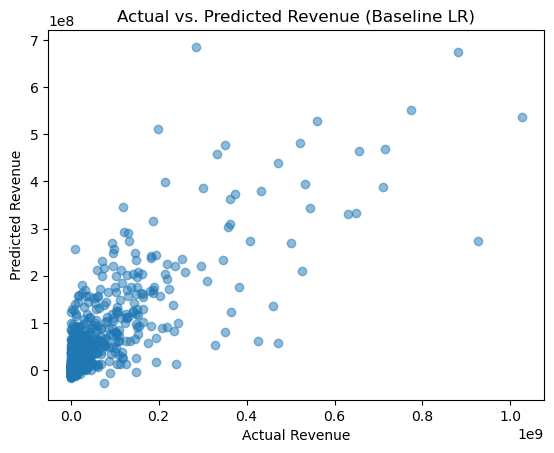

In [43]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue (Baseline LR)")
plt.show()


### 3.4 Evaluation
To evaluate the baseline model, I predicted on the test set and calculated the Root Mean Squared Error (RMSE):
$$
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \bigl(y_i - \hat{y}_i\bigr)^2}
$$
I obtained an RMSE of approximately $81.3 million, which means that on average, the model’s predictions differ from the actual revenue by around $81.3 million. While this figure might seem large, it reflects the wide range of movie revenues in the dataset—some films earn just a few thousand dollars, while others gross hundreds of millions or even over a billion.

This baseline model likely struggles with outliers (blockbuster films) and the highly skewed distribution of revenue. A single mega-hit can be off by hundreds of millions, driving up the overall RMSE. Therefore, I plan to explore log transforms, additional features, and potentially non-linear models in subsequent experiments to reduce error and better capture the variability in box office returns.

Reflections on the Baseline Model:
- This approach confirms that budget is important but not sufficient to accurately predict all movies' revenue, especially at the extremes.
- Including additional features (like genres, cast popularity, or even a log transform of revenue) could improve performance.
- The baseline provides a benchmark: any future experiments should aim to reduce the RMSE below $3 million and/or increase $R^2$ beyond 0.40.

## Experiment 2